In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation

In [2]:
df = pd.read_csv('auto1_prep.csv', sep=',')
df['car age']=(2021-df['year'])
df['cost level']=np.where (df['price']<=9.5,0,1)
df

,brand,year,price,car_mileage,fuel,power,transmission,car age,cost level
0,0,2006.0,8.584852,5.393628,0,2.0,2,15.0,0
1,1,2017.0,9.740969,5.351858,0,2.0,2,4.0,1
2,2,2015.0,9.629051,5.056246,0,2.0,2,6.0,1
3,0,2000.0,8.516993,5.703782,0,2.0,2,21.0,0
4,3,2010.0,9.937889,6.525030,0,3.0,1,11.0,1
...,...,...,...,...,...,...,...,...,...
212,0,2016.0,9.546741,5.135798,0,2.0,2,5.0,1
213,4,2010.0,9.332558,5.509388,0,2.0,2,11.0,0
214,3,2000.0,8.517193,5.521461,0,3.0,2,21.0,0
215,3,2001.0,8.922658,5.913503,0,2.0,1,20.0,0


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['brand', 'year', 'price', 'car_mileage', 'fuel', 'power', 'transmission', 'car age', 'cost level']).round()

,brand,year,price,car_mileage,fuel,power,transmission,car age,cost level
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
212,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
213,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
214,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
215,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Number of clusters

C:\Users\Julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


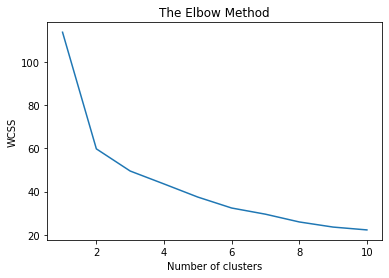

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Наибольший перелом наблюдается при двух кластерах (так же как в иерархической кластеризации)

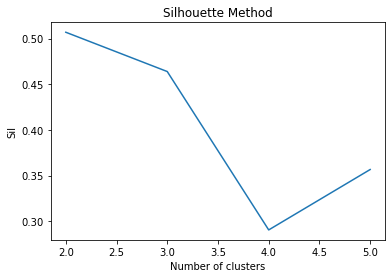

2:0.506984262658551
3:0.4639423167819869
4:0.2904867498621762
5:0.3566281946344656


In [36]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters = k).fit(df)  
    preds = kmeans.fit_predict(df)
    sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
    print(str(i+2) +":"+ str(sil[i]))

В данных есть средневыраженные структуры, т.к. Silhouette меняется от 0.3 до 0.5 
При 2-х кластерах Silhouette достигает максимума.

# Model

In [37]:
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['brand', 'year', 'price', 'car_mileage', 'fuel', 'power', 'transmission', 'car age', 'cost level'])

,brand,year,price,car_mileage,fuel,power,transmission,car age,cost level
0,0.225371,0.563535,0.495422,0.574541,0.076923,0.485880,0.923077,0.436465,7.216450e-16
1,0.179465,0.809677,0.804541,0.551188,0.081967,0.533911,0.836066,0.190323,1.000000e+00


Слабо вариативными признаками являются: brand, car_mileage, fuel, power, transmission. Их мы не будем использовать в кластеризации.

# Feature Reduction

In [38]:
X = df[:, [1, 2, 8]]

In [39]:
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['year','price','cost level']).round()

,year,price,cost level
0,1.0,0.0,0.0
1,1.0,1.0,1.0


# Results matching

In [43]:
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [44]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.9618379997893295

Результаты, полученые на основе кластеризаций, пересекаются на 96%

In [42]:
import pickle
obj = {'km': km}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()